<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/6-statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Statistics

This class, *Intro to Statistics*, builds on probability theory to enable us to quantify our confidence about how distributions of data are related to one another. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of all of the essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms. You’ll also learn how to use regression to make predictions about the future based on training data. 

The content covered in this class builds on the content of other classes in the *Machine Learning Foundations* series (linear algebra, calculus, and probability theory) and is itself foundational for the *Optimization* class. 

Over the course of studying this topic, you'll: 

* Develop an understanding of what’s going on beneath the hood of predictive statistical models and machine learning algorithms, including those used for deep learning. 
* Hypothesize about and critically evaluate the inputs and outputs of machine learning algorithms using essential statistical tools such as the t-test, ANOVA, and R-squared. 
* Use historical data to predict the future using regression models that take advantage of frequentist statistical theory (for smaller data sets) and modern machine learning theory (for larger data sets), including why we may want to consider applying deep learning to a given problem.


**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Frequentist Statistics*

* Frequentist vs Bayesian Statistics
* Review of Relevant Probability Theory
* *z*-scores and Outliers
* *p*-values
* Comparing Means with t-tests
* Confidence Intervals
* ANOVA: Analysis of Variance
* Pearson Correlation Coefficient
* R-Squared Coefficient of Determination
* Correlation vs Causation
* Correcting for Multiple Comparisons 

*Segment 2: Regression*

* Features: Independent vs Dependent Variables
* Linear Regression to Predict Continuous Values 
* Fitting a Line to Points on a Cartesian Plane
* Ordinary Least Squares
* Logistic Regression to Predict Categories 

*Segment 3: Bayesian Statistics*

* (Deep) ML vs Frequentist Statistics
* When to use Bayesian Statistics
* Prior Probabilities
* Bayes’ Theorem
* PyMC3 Notebook
* Resources for Further Study of Probability and Statistics

## Segment 1: Frequentist Statistics

In [477]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [478]:
np.random.seed(42)

### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [479]:
x = st.skewnorm.rvs(10, size=1000)

In [480]:
x[0:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

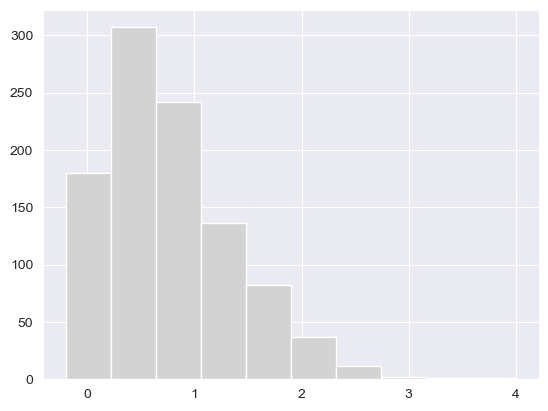

In [481]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [482]:
xbar = x.mean()
xbar

0.7719211854654121

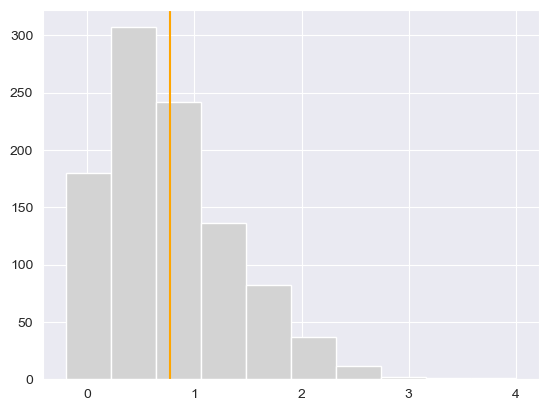

In [483]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [484]:
np.median(x) 

0.6514202574279577

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

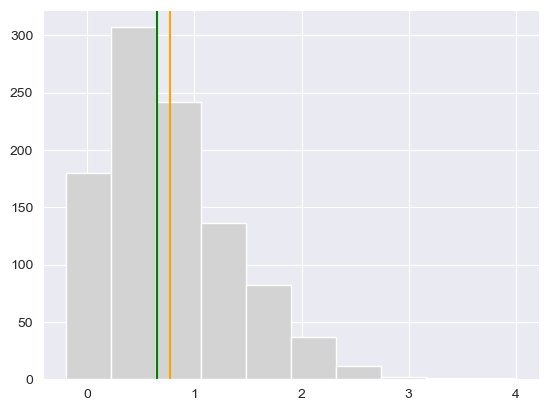

In [485]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Measures of Dispersion

#### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [486]:
x.var()

0.35528419278021617

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

In [487]:
x.var()**(1/2)

0.5960572059628305

In [488]:
sigma = x.std()
sigma

0.5960572059628305

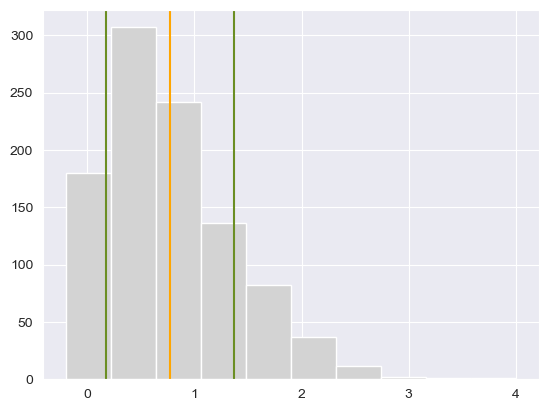

In [489]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [490]:
sigma/(x.size)**(1/2)

0.018848983865986414

In [491]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.018858415432183823

In [492]:
st.sem(x, ddof=0)

0.018848983865986414

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

### Gaussian Distribution

After Carl Friedrich Gauss. Also known as **normal distribution**: 

In [493]:
x = np.random.normal(size=10000)

In [494]:
sns.set_style('ticks')

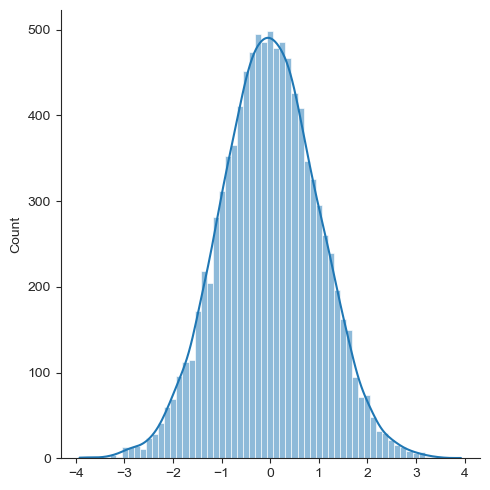

In [495]:
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [496]:
x.mean()

-0.016263054549091938

In [497]:
x.std()

1.0039756140435032

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [498]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949, -0.99434937, -0.74023225, -0.54129909])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [499]:
x_sample.mean()

-0.35958129882198664

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [500]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

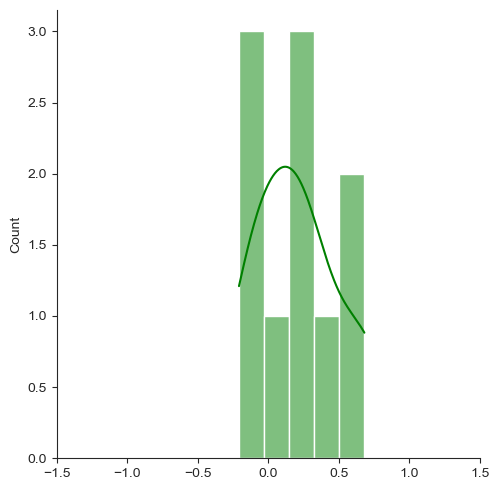

In [501]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

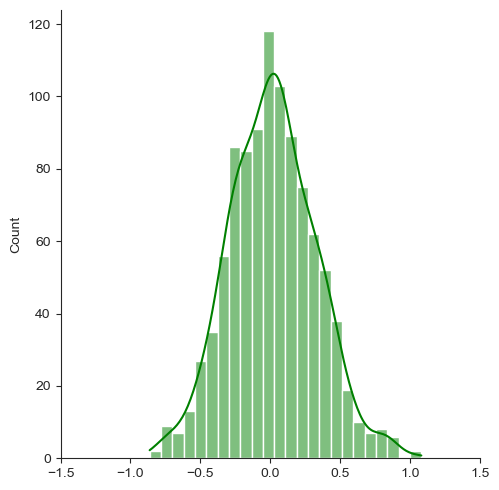

In [502]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

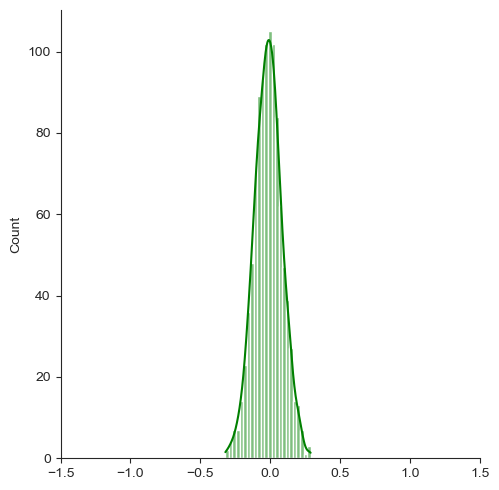

In [503]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

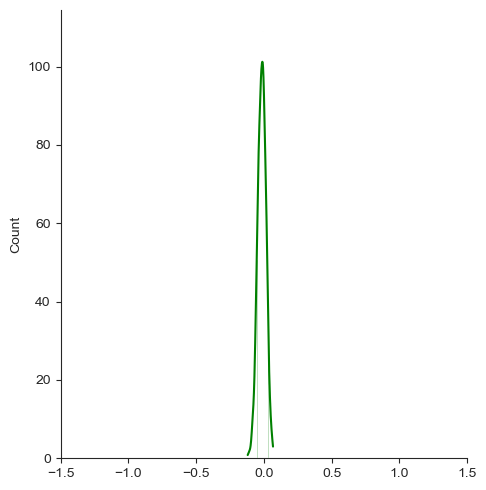

In [504]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [505]:
s = st.skewnorm.rvs(10, size=10000)

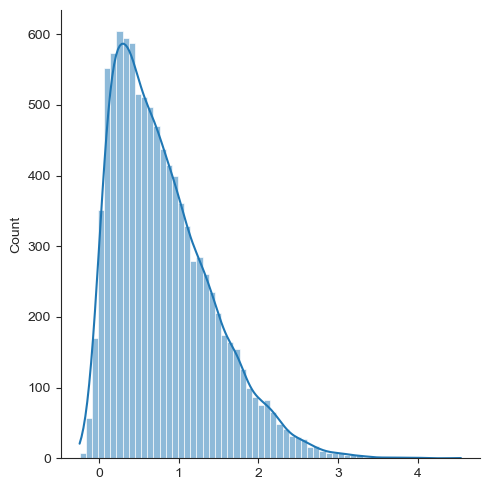

In [506]:
_ = sns.displot(s, kde=True)

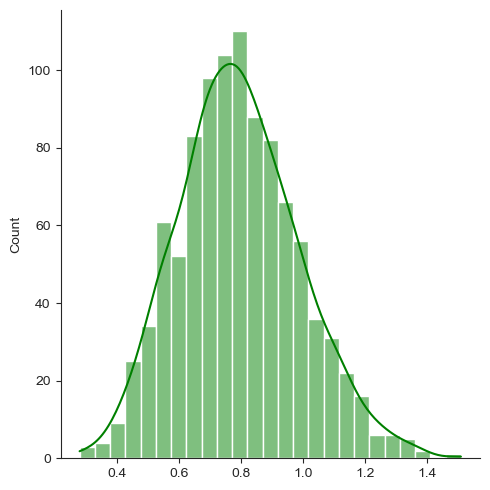

In [507]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

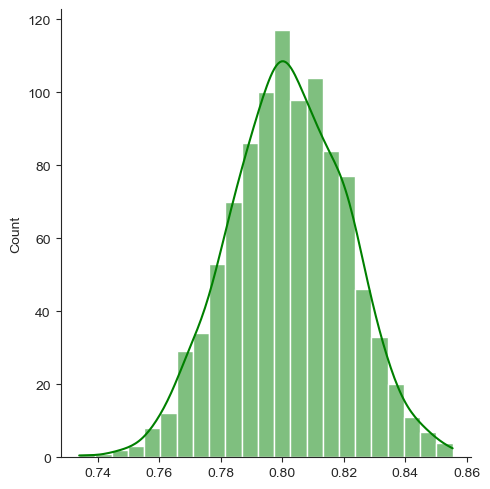

In [508]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [509]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

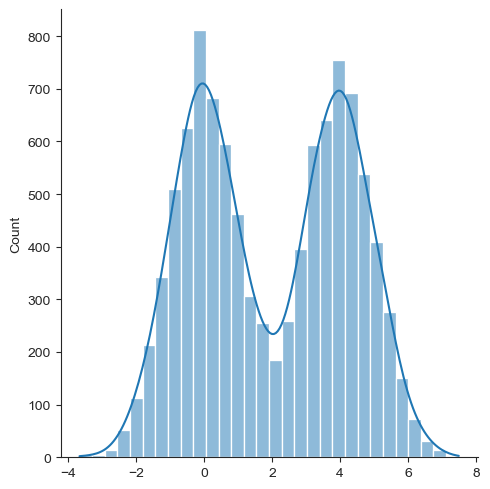

In [510]:
_ = sns.displot(m, kde=True)

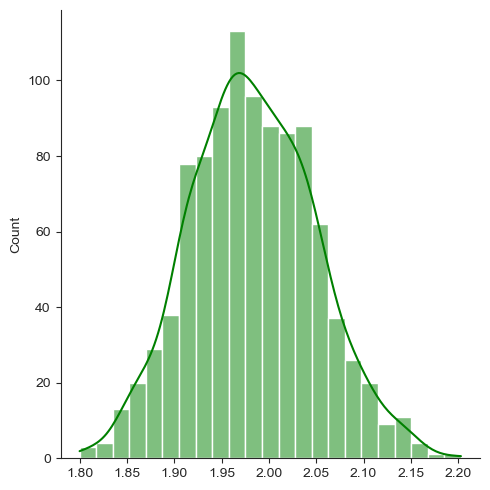

In [511]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

In [512]:
u = np.random.uniform(size=10000)

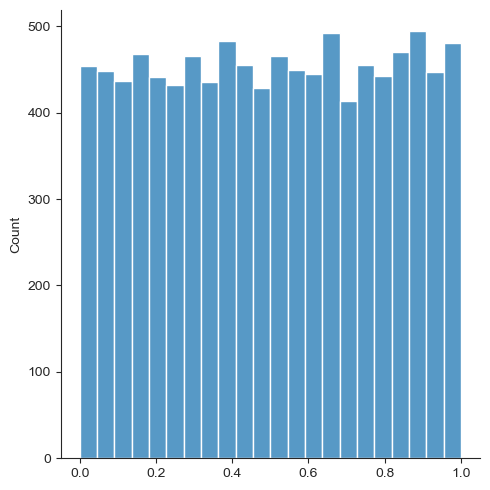

In [513]:
_ = sns.displot(u)

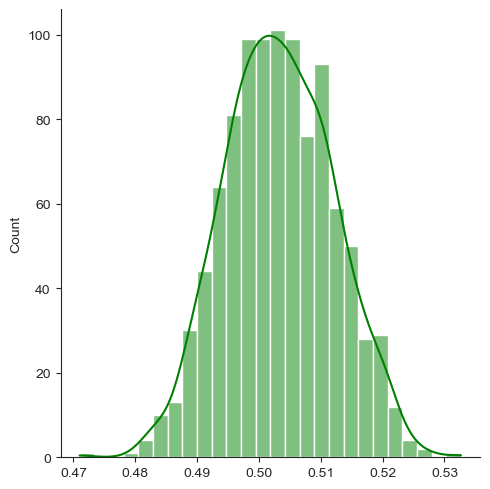

In [514]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not. 

### z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is: 
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [515]:
x_i = 85
mu = 60
sigma = 10

In [516]:
x = np.random.normal(mu, sigma, 10000)

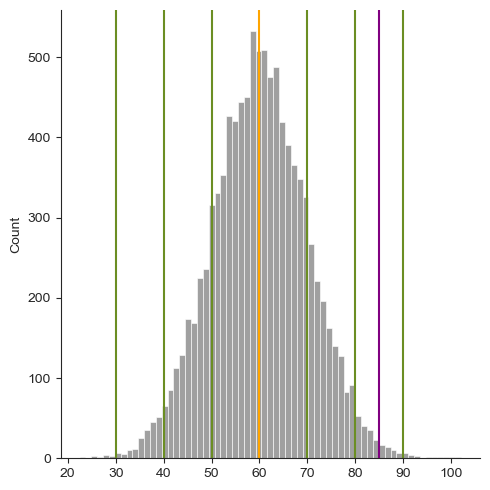

In [517]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations above the mean: 

In [518]:
z = (x_i - mu)/sigma
z

2.5

Or using our simulated class of 10k CS101 students: 

In [519]:
z = (x_i - np.mean(x))/np.std(x)
z

2.5063103401632336

Less than one percent of the class outperformed you: 

In [520]:
len(np.where(x > 85)[0])

69

In [521]:
100*69/10000

0.69

In [522]:
np.percentile(x, 99)

83.35787058294662

In contrast, if the mean score of your peers is 90 and the standard deviation is 2: 

In [523]:
mu = 90
sigma = 2

In [524]:
y = np.random.normal(mu, sigma, 10000)

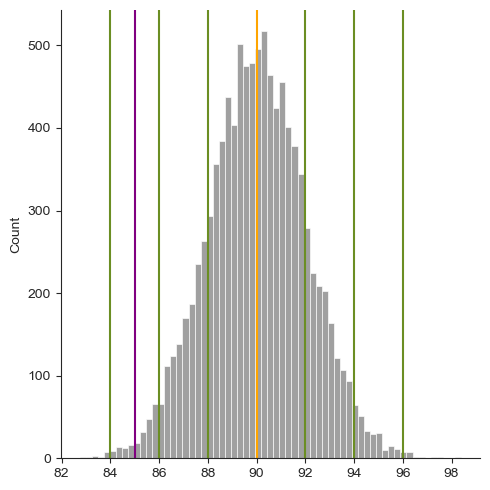

In [525]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations *below* the mean (!): 

In [526]:
z = (x_i - mu)/sigma
z

-2.5

Or using our simulated class of 10k CS101 students: 

In [527]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.479852596293303

In which case, over 99% of the class outperformed you: 

In [528]:
len(np.where(y > 85)[0])

9933

In [529]:
100*9933/10000

99.33

A mere 67 folks attained worse: 

In [530]:
10000-9933

67

In [531]:
np.percentile(y, 1)

85.3781445632019

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**. 

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

**Exercises**

1. You clean and jerk 100kg in a weightlifting competition. The mean C&J weight at the competition is 100kg. What's your z-score for the C&J?
2. You snatch 100kg in the same competition. The mean snatch weight is 80kg with a standard deviation of 10kg. What's your z-score for the snatch? 
3. In olympic weightlifting, your overall score is the sum total of your C&J and snatch weights. The mean of these totals across competitors is 180kg with a standard deviation of 5kg. What's your overall z-score in the competition? 

**Spoiler alert**: Solutions below

**Solutions**
1. zero
2. two
3. four (you may have won the meet!)

### *p*-values

These quantify the *p*robability that a given observation would occur by chance alone. 

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time: 
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF): 

In [532]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [533]:
p_below*10000

62.096653257761325

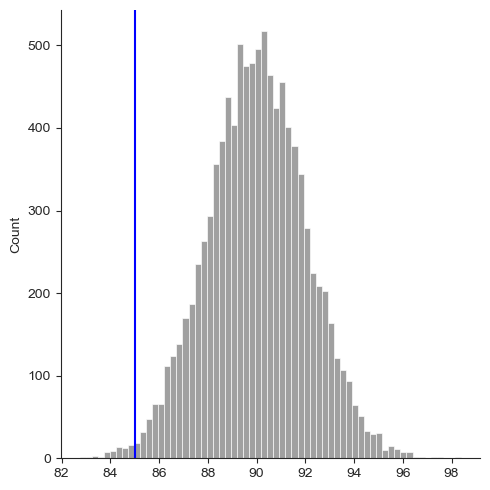

In [534]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [535]:
st.norm.cdf(2.5)

0.9937903346742238

In [536]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [537]:
p_above*10000

62.09665325776159

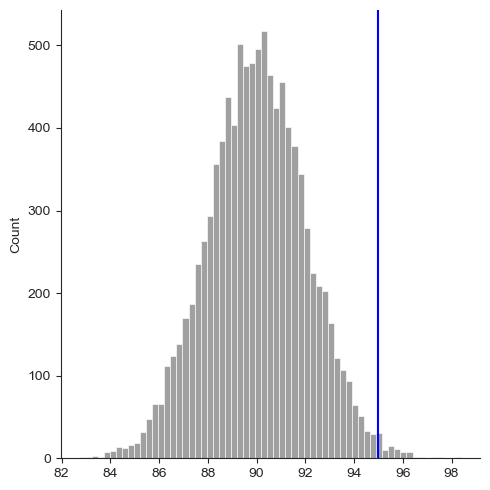

In [538]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [539]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [540]:
p_outside*10000

124.1933065155229

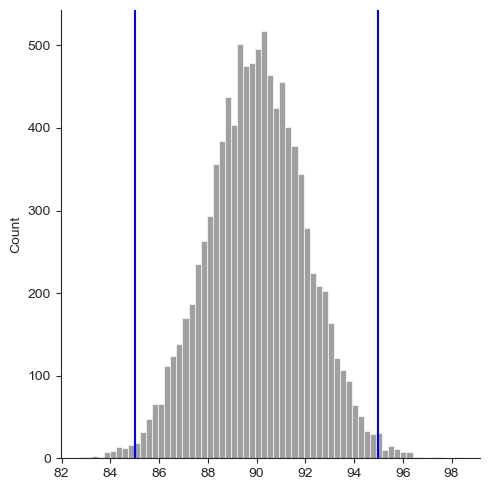

In [541]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p \approx .0124$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

For example, with a fair coin, the probability of throwing six heads *or* six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for *either of* six heads or six tails). Refer back to the `coinflip_prob()` method from the [*Probability* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/5-probability.ipynb) for proof.

If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.

The *z*-scores corresponding to $\alpha = .05$ can be obtained from the normal distribution's *percent point function* (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top: 

In [542]:
st.norm.ppf(.025)

-1.9599639845400545

In [543]:
st.norm.ppf(.975)

1.959963984540054

Thus, at the traditional $\alpha = .05$, a sampled value with *z*-score less than -1.96 or greater than 1.96 would be considered statistically significant.

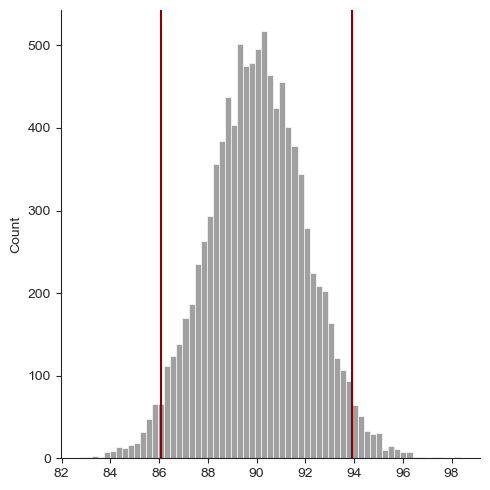

In [544]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

With a stricter threshold, say $\alpha = .01$:

In [545]:
st.norm.ppf(.005)

-2.575829303548901

In [546]:
st.norm.ppf(.995)

2.5758293035489004

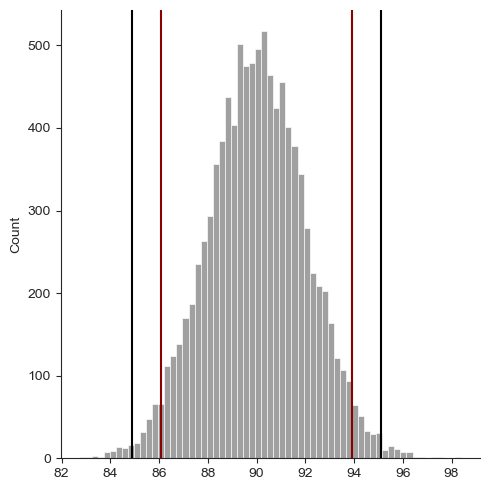

In [547]:
sns.displot(y, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.56*sigma, color='black')
_ = plt.axvline(mu-2.56*sigma, color='black')

(Time-permitting, a discussion of two-tailed vs one-tailed *p*-value tests would be informative here.)

**Exercises**

1. What are the *p*-values associated with your weightlifting results from the three preceding exercises? 
2. With the standard $\alpha = .05$, which of the three weightlifting results are "statistically significant"?

**Spoiler alert**: Solutions below

**Solutions**

1a. This result is at the mean, which is also the median for a normal distribution; exactly half of the values are above as they are below. This corresponds to the highest possible $p$-value, $p=1$, because any value in the distribution is guaranteed to be above it or below it: 

In [548]:
p_below = st.norm.cdf(0)
p_below

0.5

In [549]:
p_above = 1-st.norm.cdf(0)
p_above

0.5

In [550]:
p_below + p_above

1.0

More generally: 

In [551]:
def p_from_z(my_z):
    return 2 * st.norm.cdf(-abs(my_z))

In [552]:
p_from_z(0)

1.0

1b. The probability of a value being below $z = -2$ is:

In [553]:
p_below = st.norm.cdf(-2)
p_below

0.022750131948179195

...and the probability of a value being above $z=2$ is the same: 

In [554]:
p_above = 1-st.norm.cdf(2)
p_above

0.02275013194817921

Therefore, the *p*-value -- the probability that a value is below $z=-2$ or above $z=2$ -- is:

In [555]:
p_below + p_above

0.0455002638963584

In [556]:
p_from_z(2)

0.04550026389635839

1c. Following the same calculations as we did for 1b, the *p*-value for an observation 4 standard deviations away from the mean is: 

In [557]:
p_from_z(4)

6.334248366623973e-05

...which is about 0.0000633: 

In [558]:
0.0000633

6.33e-05

(Incidentally, very small *p* values are often reported as **negative log *P*** values as these are much easier to read...)

In [559]:
-np.log10(6.33e-05)

4.198596289982645

2. The absolute value of the *z*-score for your snatch as well as your combined score is greater than 1.96 so they're both "statistically significant". Your performance on the clean and jerk could not have been less significant! 

### Comparing Means with *t*-tests

Where *z*-scores apply to *individual values* only, *t*-tests enables us to compare (the mean of) a sample of *multiple values* to a reference mean.

#### Student's Single-Sample *t*-test

Named after William Sealy Gosset, an Oxford-trained scientist and mathematician, who became a stout yield statistician for Guinness in Dublin (from 1899 to his fatal heart attack in 1937 shortly after being promoted to head brewer). Alongside sabbaticals in Karl Pearson's UCL Biometric Laboratory, Gosset published under the pseudonym Student (including on the *t*-test, starting in 1908) as it was against Guinness policy to publish.

Recalling the formula for calculating a *z*-score: 
$$ z = \frac{x_i-\mu}{\sigma} $$

The **single-sample *t*-test** is a variation on the theme and is defined by: 
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where: 
* $\bar{x}$ is the sample mean
* $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
* $s_{\bar{x}}$ is the sample standard error

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments: 

In [560]:
x = [48, 50, 54, 60]

We can obtain the *t*-statistic for this sample as follows: 

In [561]:
xbar = np.mean(x)
xbar

53.0

In [562]:
sx = st.sem(x)
sx

2.6457513110645907

In [563]:
t = (xbar-50)/sx
t

1.1338934190276817

We can convert the *t*-value into a *p*-value using Student's *t*-distribution (similar to the normal *z*-distribution, but varies based on number of data points in sample; see [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for more detail):

In [564]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # 2nd arg to t.cdf() is "degrees of freedom"

In [565]:
p_from_t(t, len(x))

0.33925405085645427

(An illustration of **degrees of freedom**: If we know the mean of the array `x`, three of its four values can vary freely. That is, if we know three of the values in the array, the fourth has no "freedom"; it must be a specific value. Thus, the most common situation with statistical tests is that we have *n*-1 degrees of freedom.)

For everyday usage, however, we can rely on the SciPy `ttest_1samp()` method: 

In [566]:
st.ttest_1samp(x, 50)

TtestResult(statistic=1.1338934190276817, pvalue=0.33925405085645427, df=3)

#### Welch's Independent *t*-test

In ordinary circumstances, if we have two samples whose means we'd like to compare, we use an **independent *t*-test**. 

In [567]:
penguins = sns.load_dataset('penguins').dropna() # some rows are missing data

In [568]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [569]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [570]:
adelie = penguins[penguins.species == 'Adelie']

In [571]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [572]:
np.unique(adelie.island, return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [573]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

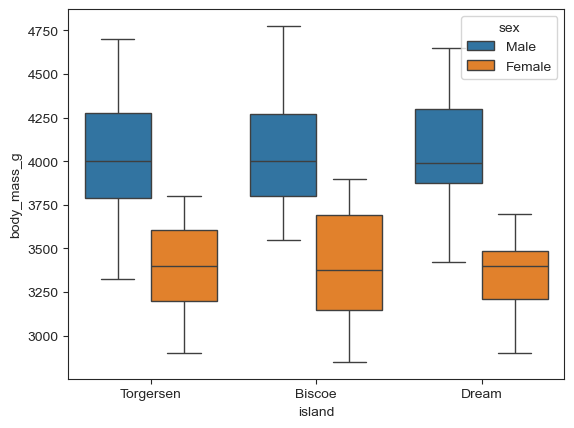

In [574]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

Mass doesn't appear to vary by island, so we can feel comfortable grouping the data together by island. Weight does, however, appear to vary by sex so let's take a closer look: 

In [575]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [576]:
m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy()/1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [577]:
fbar = f.mean()
fbar

3.368835616438356

In [578]:
mbar = m.mean()
mbar

4.043493150684932

To quantify whether males weigh significantly more than females, we can use the **Welch *t*-test**, devised by the 20th c. British statistician Bernard Lewis Welch:
$$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$
Where: 
* $\bar{x}$ and $\bar{y}$ are the sample means
* $s^2_x$ and $s^2_y$ are the sample variances
* $n_x$ and $n_y$ are the sample sizes

**N.B.**: Student's independent *t*-test is markedly more popular than Welch's, but Student's assumes equal population variances (i.e., $\sigma^2_x \approx \sigma^2_y$), making it less robust. In case you're curious, Student's formula is the same as Welch's, except that it uses a pooled variance $s^2_p$ in place of individual sample variances ($s^2_x$ and $s^2_y$). You can read more about it [here](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test).

In [579]:
sf = f.var(ddof=1)
sm = m.var(ddof=1)

In [580]:
nf = f.size
nm = m.size

In [581]:
t = (fbar-mbar)/(sf/nf + sm/nm)**(1/2)
t

-13.126285923485879

Degrees of freedom for calculating the *p*-value are estimated using the [Welch–Satterthwaite equation](https://en.wikipedia.org/wiki/Welch–Satterthwaite_equation), which we won't detail but is defined as: 

In [582]:
def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))

In [583]:
df = ws_eqn(sf, sm, nf, nm)
df

135.69357893530386

In [584]:
p = 2 * st.t.cdf(-abs(t), df) # or p_from_t(t, df+1)
p

6.402319748031473e-26

In [585]:
p_from_t(t, df+1)

6.402319748031473e-26

In [586]:
-np.log10(p)

25.193662639886046

In [587]:
st.ttest_ind(f, m, equal_var=False) 

TtestResult(statistic=-13.126285923485879, pvalue=6.402319748031473e-26, df=135.69357893530386)

#### Student's Paired *t*-test

Occasionally, we have two vectors where each element in vector *x* has a corresponding element in vector *y*. 

For example, we could run an experiment where Alzheimer's disease patients receive a drug on one day (experimental condition) and a sugar pill placebo (control condition) on another day. We can then measure the patients' forgetfulness on both days to test whether the drug has a significant impact on memory.

For a given sample size, such a paired *t*-test is more powerful relative to an unpaired (independent) *t*-test because the variance of *x* is directly related to the variance in *y*: A severe Alzheimer's patient will tend to be relatively forgetful on both days, while a mild Alzheimer's patient will tend to be relatively unforgetful on both days. With paired samples, we capture this power by comparing the *difference* between *x* and *y*, e.g., the difference in forgetfulness for a given patient when given the drug relative to when given the sugar pill.

In contrast, consider the penguin dataset, wherein we wouldn't be able to obviously pair a given male penguin with a correponding female penguin. Or consider a situation where we provide a drug to one set of Alzheimer's patients while we provide a placebo to an entire different (an independent) group of patients. Indeed, with an independent *t*-test we could even have different sample sizes in the two groups whereas this is impossible with a paired *t*-test. 

Here's an example: 

In [588]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


There are 30 people in the dataset, with their pulse taken at three different time points in an experiment (i.e, after one, 15, and 30 minutes). Ten people were assigned to each of three activity groups: 

In [589]:
np.unique(exercise.kind, return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

Within each of those activity groups, half of the participants are on a low-fat diet while the other half are on a no-fat diet: 

In [590]:
np.unique(exercise.diet, return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

For simplicity, let's only consider one of the six experimental groups, say the walking, no-fat dieters: 

In [591]:
walk_no = exercise[(exercise.diet == 'no fat') & (exercise.kind == 'walking')]
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


(Note how participant 16 has a relatively low heart rate at all three timepoints, whereas participant 20 has a relatively high heart rate at all three timepoints.)

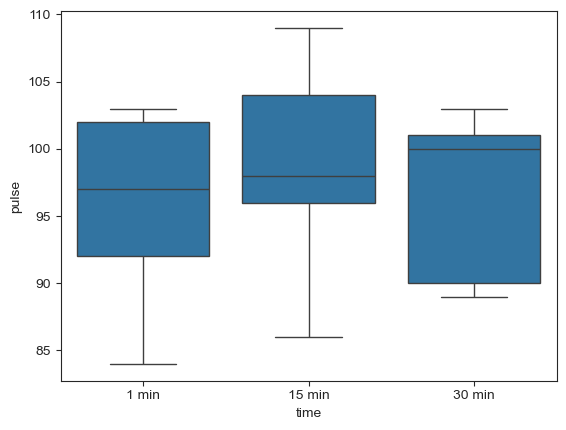

In [592]:
_ = sns.boxplot(x='time', y='pulse', data=walk_no)

In [593]:
min1 = walk_no[walk_no.time == '1 min']['pulse'].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [594]:
min1.mean()

95.6

In [595]:
min15 = walk_no[walk_no.time == '15 min']['pulse'].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [596]:
min15.mean()

98.6

In [597]:
min30 = walk_no[walk_no.time == '30 min']['pulse'].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [598]:
min30.mean()

96.6

(With paired samples, we can plot the values in a scatterplot, which wouldn't make any sense for independent samples, e.g.:)

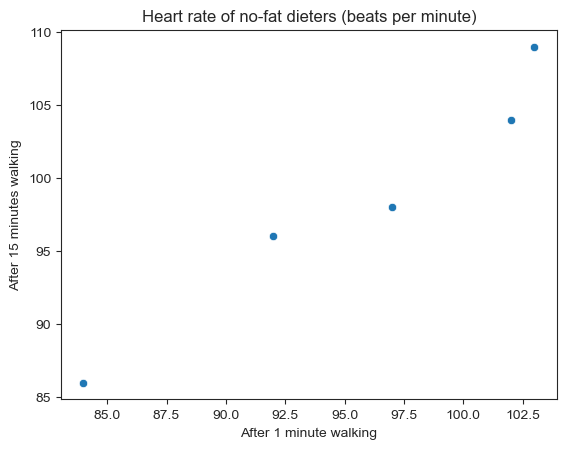

In [599]:
sns.scatterplot(x=min1, y=min15)
plt.title('Heart rate of no-fat dieters (beats per minute)')
plt.xlabel('After 1 minute walking')
_ = plt.ylabel('After 15 minutes walking')

To assess whether the mean heart rate varies significantly after one minute of walking relative to after 15 minutes, we can use Student's **paired-sample** (a.k.a., **dependent**) *t*-test: 
$$ t = \frac{\bar{d} - \mu_0}{s_\bar{d}} $$ 
Where: 
* $d$ is a vector of the differences between paired samples $x$ and $y$
* $\bar{d}$ is the mean of the differences
* $\mu_0$ will typically be zero, meaning the null hypothesis is that there is no difference between $x$ and $y$
* $s_\bar{d}$ is the standard error of the differences

(Note how similar to single-sample *t*-test formula.)

In [600]:
d = min15 - min1
d

array([2, 6, 4, 1, 2])

In [601]:
dbar = d.mean()
dbar

3.0

In [602]:
sd = st.sem(d)
sd

0.8944271909999159

In [603]:
t = (dbar-0)/sd
t

3.3541019662496847

In [604]:
p_from_t(t, d.size)

0.02846020325433834

In [605]:
# rel = related values
st.ttest_rel(min15, min1)

TtestResult(statistic=3.3541019662496847, pvalue=0.02846020325433834, df=4)

In contrast, if we were to put the same values into an independent *t*-test...

In [606]:
st.ttest_ind(min15, min1, equal_var=False)

TtestResult(statistic=0.5729114862838532, pvalue=0.5826164805627767, df=7.91150470414055)

#### Machine Learning Examples

* Single-sample: Does my stochastic model tend to be more accurate than an established benchmark? 
* Independent samples: Does my model have unwanted bias in it, e.g., do white men score higher than other demographic groups with HR model? 
* Paired samples: Is new TensorFlow.js model significantly faster? (paired by browser / device)

**Exercises**
1. You run four additional experiments with your GMO brewing yeast and now have the following eight stout yields: `[48, 50, 54, 60, 49, 55, 59, 62]`. What is the *t*-statistic and is it significantly different from the 50L-yielding baseline process? 
2. Does the flipper length of Adélie penguins from Dream island vary significantly by sex? 
2. Was the heart rate of low-fat dieters different after one minute of rest relative to after 15 minutes of rest? 

**Spoiler alert**: Solutions below

In [607]:
# Q1

x = [48, 50, 54, 60, 49, 55, 59, 62]

xbar = np.mean(x)
sx = st.sem(x)
t = (xbar - 50) / sx
t

2.448085108904054

In [608]:
# converting t to p-value
2 * st.t.cdf(-abs(t), 7) 

0.0442312968303811

In [609]:
# Q2
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [610]:
selection = penguins[(penguins['species']=='Adelie') & (penguins['island']=='Dream')]
selection = selection[['flipper_length_mm', 'sex']]
selection

,flipper_length_mm,sex
30,178.0,Female
31,178.0,Male
32,188.0,Female
33,184.0,Male
34,195.0,Female
35,196.0,Male
36,190.0,Male
37,180.0,Female
38,181.0,Female
39,184.0,Male


In [611]:
male_array = selection[selection['sex']=='Male']['flipper_length_mm'].to_numpy()
female_array = selection[selection['sex']=='Female']['flipper_length_mm'].to_numpy()
female_array

array([178., 188., 195., 180., 181., 182., 186., 185., 190., 191., 189.,
       190., 202., 185., 187., 190., 178., 193., 187., 191., 185., 193.,
       188., 192., 184., 195., 187.])

In [612]:
fbar = np.mean(female_array)
mbar = np.mean(male_array)
sf = female_array.var(ddof=1)
sm = male_array.var(ddof=1)
nf = female_array.size
nm = male_array.size
t = (fbar - mbar) / (sf / nf + sm / nm) ** (1 / 2)
t




-2.4460386199991864

In [613]:
mbar

191.92857142857142

In [614]:
degrees_of_freedom = ws_eqn(sf,sm,nf,nm)
degrees_of_freedom

51.48552818449215

In [615]:
p = 2 * st.t.cdf(-abs(t), degrees_of_freedom) # or p_from_t(t, df+1)
p

0.017898599613024188

In [616]:
st.ttest_ind(female_array, male_array, equal_var=False) 

TtestResult(statistic=-2.446038619999187, pvalue=0.017898599613024178, df=51.48552818449215)

**Solutions**
1. The GMO yeast yields a mean of 54.6L, which is significantly more stout than the baseline process, *t*(7) = 2.45, $p < .05$.

In [617]:
st.ttest_1samp([48, 50, 54, 60, 49, 55, 59, 62], 50)

TtestResult(statistic=2.448085108904054, pvalue=0.0442312968303811, df=7)

2. On Dream island, the flippers of male Adélie penguins (191.9 mm) are significantly longer than those of females (187.9 mm), *t* = 2.4, *p* < .05.

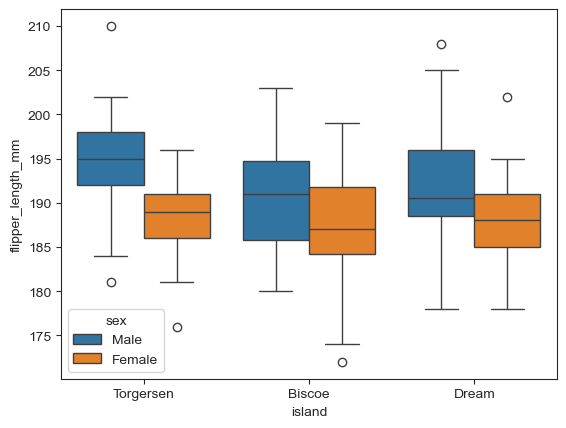

In [618]:
_ = sns.boxplot(x='island', y='flipper_length_mm', hue='sex', data=adelie)

In [619]:
f = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['flipper_length_mm'].to_numpy()
m = adelie[(adelie.sex == 'Male') & (adelie.island == 'Dream')]['flipper_length_mm'].to_numpy()

In [620]:
f.mean()

187.85185185185185

In [621]:
m.mean()

191.92857142857142

In [622]:
tp = st.ttest_ind(f, m, equal_var=False)
tp

TtestResult(statistic=-2.446038619999187, pvalue=0.017898599613024178, df=51.48552818449215)

In [623]:
tp.pvalue

0.017898599613024178

In [624]:
#Obs. O professor fez errado na solução dele pois esqueceu de considerar a questão da ilha específica e fez o estudo desprezando essa informação.

3. The heart rate of low-fat dieters did not change significantly after one minute of rest (88.6 bpm) relative to after 15 minutes of rest (89.6 bpm), *t*=2.2, *p* = .09.

In [625]:
rest_lo = exercise[(exercise.diet == 'low fat') & (exercise.kind == 'rest')]

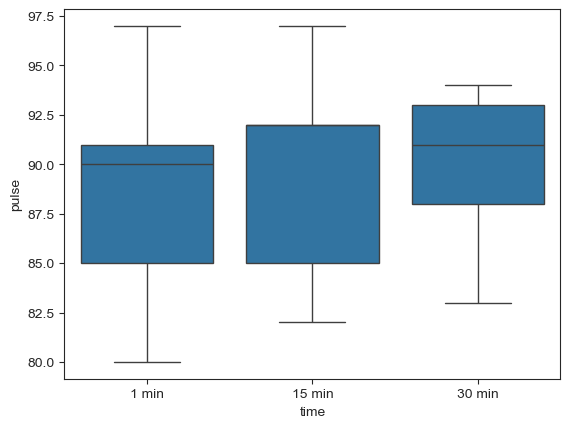

In [626]:
_ = sns.boxplot(x='time', y='pulse', data=rest_lo)

In [627]:
min1 = rest_lo[rest_lo.time == '1 min']['pulse'].to_numpy()
min1.mean()

88.6

In [628]:
min15 = rest_lo[rest_lo.time == '15 min']['pulse'].to_numpy()
min15.mean()

89.6

In [629]:
st.ttest_rel(min15, min1)

TtestResult(statistic=2.23606797749979, pvalue=0.08900934250008564, df=4)

### Confidence Intervals

When examining sample means as we have been for the *t*-test, a useful statistical tool is the **confidence interval** (CI), which we for example often see associated with polling results when there's an upcoming election. CIs allow us to make statements such as "there is a 95% chance that the population mean lies within this particular range of values".

We can calculate a CI by rearranging the *z*-score formula: 
$$ \text{C.I.} = \bar{x} \pm z \frac{s}{\sqrt{n}} $$
Where: 
* $\bar{x}$ is the sample mean
* $s$ is the sample standard deviation
* $n$ is the sample size
* $z$ corresponds to a *z*-score threshold (e.g., the most common 95% CI is $z \pm 1.960$; other popular ones are the 90% CI at $z \pm 1.645$ and the 99% CI at $z \pm 2.576$)

For example, to find the 95% confidence interval for the true mean yield of our GMO yeast: 

In [630]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])

In [631]:
xbar = x.mean()
s = x.std()
n = x.size

In [632]:
z = 1.96

In [633]:
def CIerr_calc(my_z, my_s, my_n):
    return my_z*(my_s/my_n**(1/2))

In [634]:
CIerr = CIerr_calc(z, s, n)

In [635]:
CIerr

3.4637403013216796

In [636]:
xbar + CIerr

58.08874030132168

In [637]:
xbar - CIerr

51.16125969867832

Therefore, there's a 95% chance that the true mean yield of our GMO yeast lies in the range of 51.2 to 58.1 liters. Since this CI doesn't overlap with the established baseline mean of 50L, this corresponds to stating that the GMO yield is significantly greater than the baseline where $\alpha = .05$, as we already determined: 

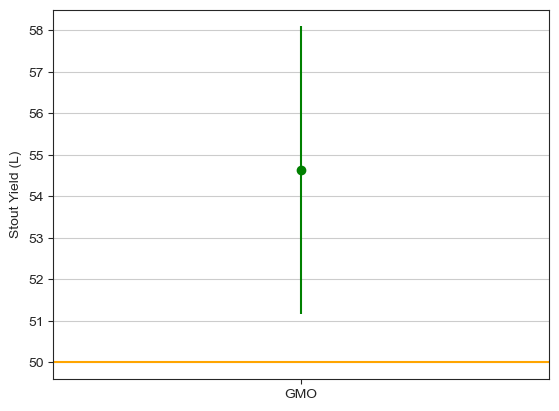

In [638]:
fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [CIerr], fmt='o', color='green')
_ = ax.axhline(50, color='orange')

Similarly, we can compare several sample means with CIs. Using our penguins again: 

In [639]:
fCIerr = CIerr_calc(z, sf, nf)
mCIerr = CIerr_calc(z, sm, nm)

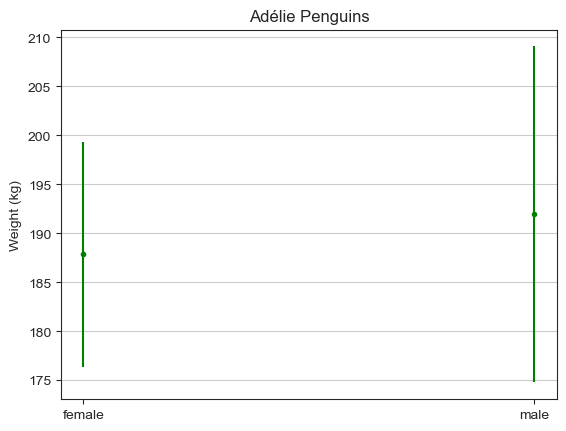

In [640]:
fig, ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [fbar, mbar], [fCIerr, mCIerr], 
                fmt='.', color='green')

The CIs are nowhere near overlapping, corresponding to the extremely significant (-log*P* $\approx 25$) difference in penguin weight.

In contrast, the CIs for female penguins from the three islands...

In [641]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

In [642]:
means = [t.mean(), b.mean(), d.mean()]

In [643]:
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1) # s_t to disambiguate stats package

In [644]:
nt, nb, nd = t.size, b.size, d.size

In [645]:
CIerrs = [CIerr_calc(z, s_t, nt), CIerr_calc(z, sb, nb), CIerr_calc(z, sd, nd)]

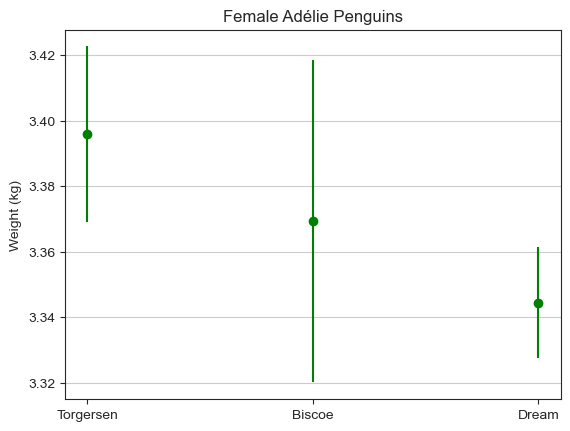

In [646]:
fig, ax = plt.subplots()
plt.title('Female Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, CIerrs, 
                fmt='o', color='green')

### ANOVA: Analysis of Variance

**Analysis of variance** (ANOVA) enables us to compare more than two samples (e.g., all three islands in the case of penguin weight) in a single statistical test.

To apply ANOVA, we must make three assumptions: 
1. Independent samples
2. Normally-distributed populations
3. *Homoscedasticity*: Population standard deviations are equal

While not especially complicated under the hood (you can dig into the formulae [here](https://en.wikipedia.org/wiki/Analysis_of_variance#Logic)), ANOVA might be the least widely-applicable topic within *Intro to Stats* to ML so in the interest of time, we'll skip straight to the Python code: 

In [647]:
st.f_oneway(t, b, d)

F_onewayResult(statistic=0.22627752438542714, pvalue=0.7980777848719299)

### Pearson Correlation Coefficient

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. Correlation is much more common because of this difference. 

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [648]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [649]:
x = iris.sepal_length
y = iris.petal_length

In [650]:
sns.set_style('darkgrid')

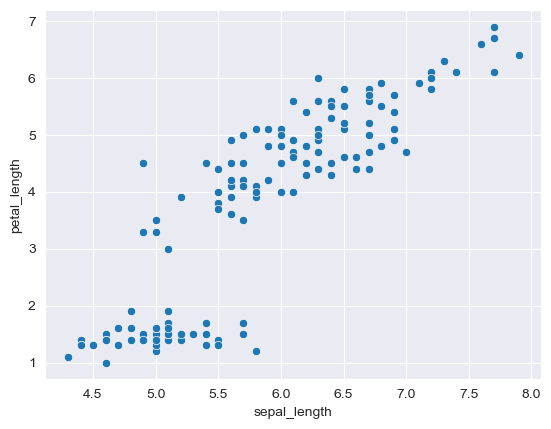

In [651]:
_ = sns.scatterplot(x=x, y=y)

In [652]:
n = iris.sepal_width.size

In [653]:
xbar, ybar = x.mean(), y.mean()

In [654]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [655]:
cov = sum(product)/n
cov

1.2658200000000006

In [656]:
r = cov/(np.std(x)*np.std(y))
r

0.8717537758865835

We reached this point in *Probability*. Now, as for how to determine a *p*-value, we first calculate the *t*-statistic...
$$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

In [657]:
t = r*((n-2)/(1-r**2))**(1/2)
t

21.646019345759807

...which we can convert to a *p*-value as we've done several times above: 

In [658]:
p = p_from_t(t, n-1) 
p

1.0386674194495906e-47

In [659]:
-np.log10(p)

46.98352349096045

This confirms that iris sepal length is extremely positively correlated with petal length.

All of the above can be done in a single line with SciPy's `pearsonr()` method: 

In [660]:
st.pearsonr(x, y)

PearsonRResult(statistic=0.8717537758865833, pvalue=1.0386674194496243e-47)

And, for reference, here's a correlation that is not significant ($r \approx 0$): 

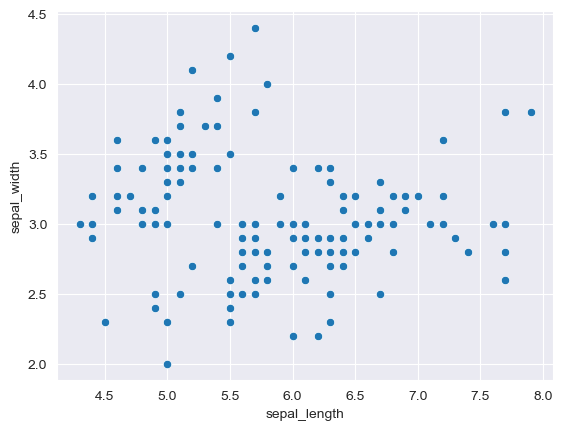

In [661]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [662]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300195, pvalue=0.1518982607114483)

### The Coefficient of Determination

...also known as $r^2$, this is the proportion of variance in one variable explained by another. 

It can range from 0 to 1 and it is simply the square of the Pearson $r$:

In [663]:
r

0.8717537758865835

In [664]:
rsq = r**2
rsq

0.7599546457725157

In this case, it indicates that 76% of the variance in iris petal length can be explained by sepal length. (This is easier to understand where one variable could straightforwardly drive variation in the other; more on that in Segment 2.)

For comparison, only 1.4% of the variance in sepal width can be explained by sepal length: 

In [665]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080679

### Correlation vs Causation

Correlation doesn't imply **causation** on its own. E.g., sepal length and petal length are extremely highly correlated, but this doesn't imply that sepal length causes petal length or vice versa. 

There is a lot to causality and I recommend Judea Pearl's [*Causality*](http://bayes.cs.ucla.edu/BOOK-2K/), the classic technical text on the topic, if you're keen to explore this in depth. [*The Book of Why*](http://bayes.cs.ucla.edu/WHY/) is an exceptional lay alternative by the same author.

In brief, three criteria are required for inferring causal relationships: 

1. **Covariation**: Two variables vary together (this criterion is satisfied by sepal and petal length)
2. **Temporal precedence**: The affected variable must vary *after* the causal variable is varied. 
3. **Elimination of extraneous variables**: We must be sure no third variable is causing the variation. This can be tricky for data we obtained through observation alone, but easier when we can control the causal variable, e.g., with (ideally double-blind) randomized control trials. 

Some examples of where we could infer causality from correlation in ML: 
* Additional neurons --> higher accuracy
* Additional servers or RAM --> shorter inference time
* Removal of pronouns --> less unwanted bias

### Correcting for Multiple Comparisons

A major issue with frequentist statistics is the issue of multiple comparisons:

* If you perform 20 statistical tests where there is no real effect (i.e., the null hypothesis is true), then we would expect one of them to come up significant by chance alone (i.e., a *false positive* or *Type I error*).
* If you perform a hundred tests in such a circumstance, then you should expect five false positives.

The most straightforward, and indeed the most widely-used, solution is the **Bonferroni correction** (named after the 20th c. Italian mathematician Carlo Emilio Bonferroni). Assuming, we'd like an overall $\alpha = .05$: 

* If we're planning on conducting ten tests ($m=10$), the significance threshold for each individual test is $\frac{\alpha}{m} = \frac{.05}{10} = .005$
* With 20 tests, it's $\frac{\alpha}{m} = \frac{.05}{20} = .0025$
* With 100 tests, it's $\frac{\alpha}{m} = \frac{.05}{100} = .0005$

(Other, less straightforward, approaches for adjusting $\alpha$ for multiple comparisons exist. They're beyond our scope, but the major ones are listed under the *General methods of alpha adjustment for multiple comparisons* heading [here](https://en.wikipedia.org/wiki/Multiple_comparisons_problem#See_also).)

**Return to slides here.**

## Segment 2: Regression

### Linear Least Squares for Fitting a Line to Points on a Cartesian Plane

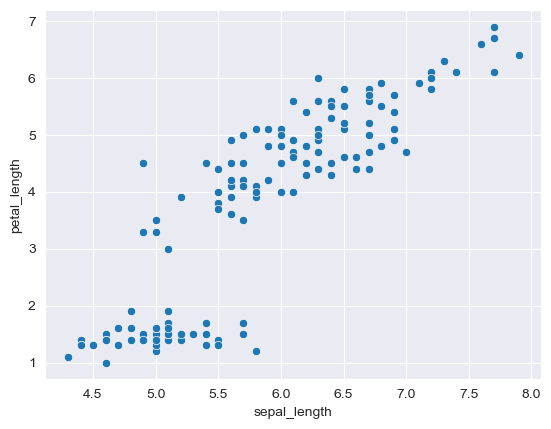

In [666]:
_ = sns.scatterplot(x=x, y=y)

Consider fitting a line to points on a **Cartesian plane** (2-D surface, with $y$-axis perpendicular to horizontal $x$-axis). To fit such a line, the only parameters we require are a $y$-intercept (say, $\beta_0$) and a slope (say, $\beta_1$): 

$$ y = \beta_0 + \beta_1 x $$

This corresponds to the case where we have a single feature (a single predictor variable, $x$) in a regression model: 

$$ y = \beta_0 + \beta_1 x + \epsilon $$

The $\epsilon$ term denotes **error**. For a given instance $i$, $\epsilon_i$ is a measure of the difference between the true $y_i$ and the model's estimate, $\hat{y}_i$. If the model predicts $y_i$ perfectly, then $\epsilon_i = 0$. 

Our objective is to find the parameters $\beta_0$ and $\beta_1$ that minimize $\epsilon$ across all the available data points. 

(Note that sepal length may not be an ideal example of a predictor variable, but these iris data are conveniently available at this stage of the notebook.)

In the case of a model with a single predictor $x$, there is a fairly straightforward **linear least squares** formula we can use to estimate $\beta_1$: 
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

(We'll dig further into the "least squares" concept in the next section, for now we can think of it as minimizing the squared error $(\hat{y}_i - y_i)^2$, which we isolate from $\text{cov}(x,y)$ via division by $\sigma^2_x$)

In [667]:
cov

1.2658200000000006

In [668]:
beta1 = cov/np.var(x) 
beta1

1.8584329782548419

With $\hat{\beta}_1$ in hand, we can then rearrange the line equation ($y = \beta_0 + \beta_1 x$) to estimate $\beta_0$:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [669]:
beta0 = ybar - beta1*xbar 
beta0

-7.101443369602459

In [670]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline

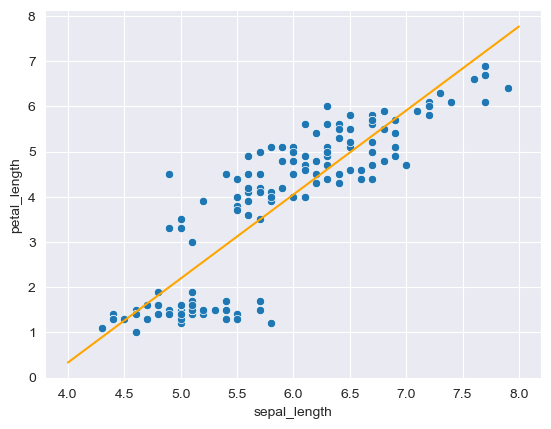

In [671]:
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color='orange')

In regression model terms, if we were provided with an sepal length $x_i$ we could now use the parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ to predict the petal length of an iris:
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

For instance, our model predicts that an iris with a 5.5cm-long sepal would have 3.1cm-long petal: 

In [672]:
x_i = 5.5

In [673]:
y_i = beta0 + beta1*x_i
y_i

3.1199380107991725

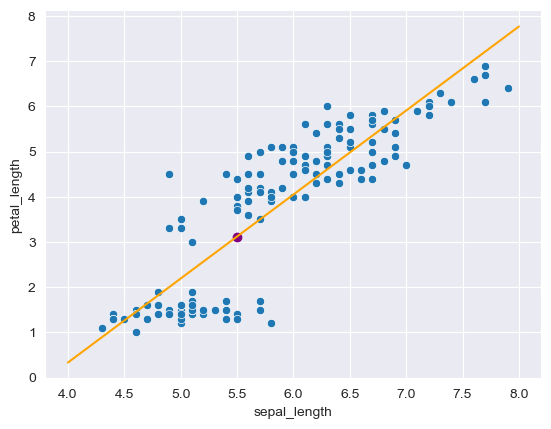

In [674]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

As a second example, using the same simulated "Alzheimer's drug" data as the [*Regression in PyTorch* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/regression-in-pytorch.ipynb) and several others in the *ML Foundations* series: 

In [675]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

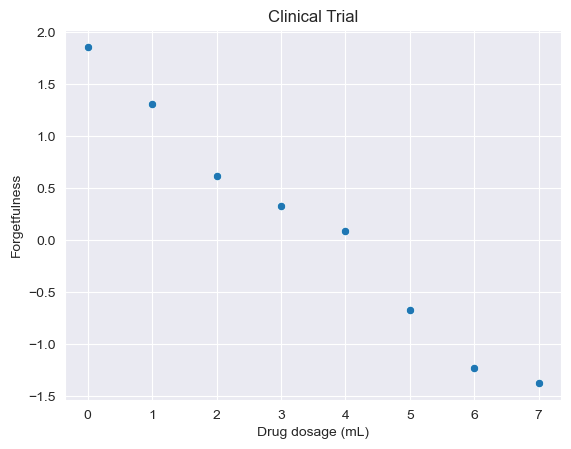

In [676]:
sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
_ = plt.ylabel("Forgetfulness")

In [677]:
cov_mat = np.cov(x, y)
cov_mat

array([[ 6.        , -2.81571429],
       [-2.81571429,  1.34362143]])

In [678]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

-0.4692857142857143

In [679]:
beta0 = y.mean() - beta1*x.mean()
beta0

1.76

In [680]:
xline = np.linspace(0, 7, 1000)
yline = beta0 + beta1*xline

By administering 4.5mL of the drug, our model predicts a forgetfulness score of -0.35:

In [681]:
x_i = 4.5

In [682]:
y_i = beta0 + beta1*x_i
y_i

-0.35178571428571437

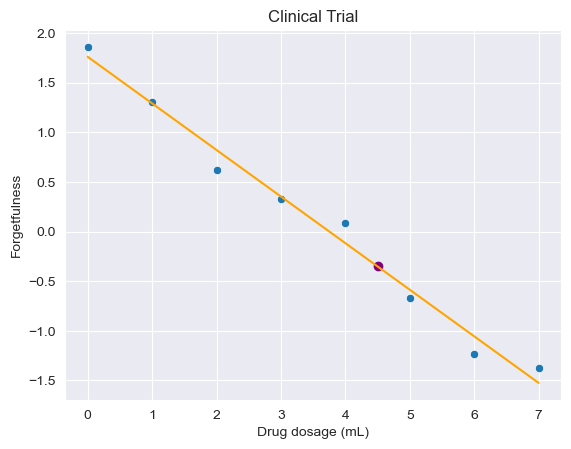

In [683]:
sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

**Exercise**: With data from female Adélie penguins, create a linear least squares model that predicts body mass with flipper length. Predict the mass of a female Adélie penguin that has a flipper length of 197mm.

In [684]:
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [685]:
x = adelie[adelie.sex == 'Female']['flipper_length_mm'].to_numpy()
y = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000

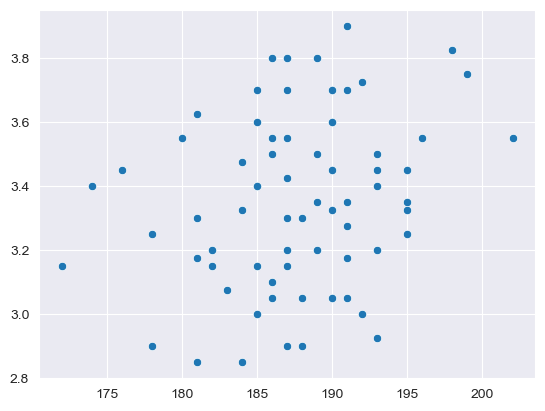

In [686]:
_ = sns.scatterplot(x=x, y=y)

In [687]:
cov_mat = np.cov(x, y)
cov_mat

array([[31.304414  ,  0.3962852 ],
       [ 0.3962852 ,  0.07256564]])

In [688]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

0.012659083726357767

In [689]:
beta0 = y.mean() - beta1*x.mean()
beta0

0.9915290574707036

In [690]:
x_i = 197

In [691]:
y_i = beta0 + beta1*x_i
y_i

3.485368551563184

In [692]:
xline = np.linspace(170, 205, 1000)
yline = beta0 + beta1*xline

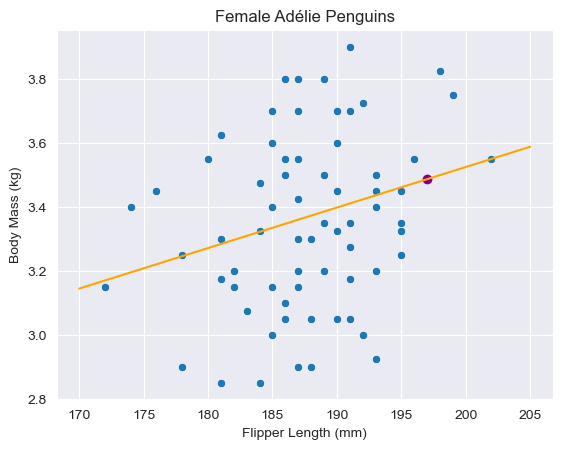

In [693]:
sns.scatterplot(x=x, y=y)
plt.title("Female Adélie Penguins")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (kg)")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

### Ordinary Least Squares

**Ordinary least squares** (OLS) is a linear least squares method we can use to estimate the parameters of regression models that have more than one predictor variable, e.g.: 

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon $$

Generalizing to $m$ predictors: 
$$ y = \beta_0 + \sum_{j=1}^m \beta_j x_j + \epsilon $$

To keep the calculations as simple as possible, however, for now we'll stick with a single predictor $x$ (in an example adapted from [here](https://en.wikipedia.org/wiki/Linear_least_squares#Example)):

In [694]:
x = np.array([1, 2, 3, 4.])
y = np.array([6, 5, 7, 10.])

In [695]:
sns.set_style('whitegrid')

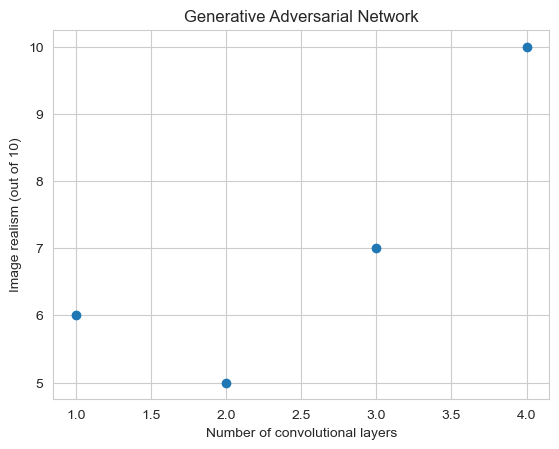

In [696]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
_ = ax.scatter(x, y)

As is typical in regression model-fitting, we have an *overdetermined* system of linear algebra equations. From the general regression equation $y = \beta_0 + \beta_1 x$, we have four equations (one for each instance $i$) with the two unknown parameters $\beta_0$ and $\beta_1$ shared across the system. 
$$ 6 = \beta_0 + \beta_1 $$
$$ 5 = \beta_0 + 2\beta_1 $$
$$ 7 = \beta_0 + 3\beta_1 $$
$$ 10 = \beta_0 + 4\beta_1 $$

Since we have more equations than unknowns, we can't solve for the parameters through algebraic rearraging. We can, however, estimate parameters that approximately solve all of the equations with the *Moore-Penrose Pseudoinverse* (from [*Linear Algebra II*](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb)) or we could use partial-derivative calculus as we'll use here. Either way, with the OLS approach, our objective is to minimize the "sum of squared errors" (SSE). 

The squared error (a.k.a. quadratic cost, from *Calc II*) for a given instance $i$ is $(\hat{y}_i-y_i)^2$.

The SSE over $n$ instances is then: 
$$ \sum_{i=1}^n (\hat{y}_i-y_i)^2 $$

In this case, where $\hat{y}_i = \beta_0 + \beta_1 x_i$, we can define the SSE function as: 
$$ S(\beta_0, \beta_1) = \sum_{i=1}^n (\beta_0 + \beta_1 x_i - y_i)^2 $$

Expanding the summation out over the four instances of $i$: 
$$ S(\beta_0, \beta_1) = [\beta_0 + \beta_1 - 6]^2 + [\beta_0 + 2\beta_1 - 5]^2 + [\beta_0 + 3\beta_1 - 7]^2 + [\beta_0 + 4\beta_1 - 10]^2 $$

Then (rather laboriously) expanding out the squares and simplifying the result by combining like terms: 
$$ S(\beta_0, \beta_1) = 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1 + 210 $$

To minimize SSE, we can now use partial derivatives. Specifically, to find where there is no slope of $S(\beta_0, \beta_1)$ with respect to $\beta_0$: 
$$ \frac{\partial S}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56 = 0 $$
...and $\beta_1$: 
$$ \frac{\partial S}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154 = 0 $$

Rearranging, we obtain a system of two linear equations called the **normal equations** (however many parameters are in the model is how many rows of equations we'll have in the system): 
$$ 8\beta_0 + 20\beta_1 = 56 $$
$$ 20\beta_0 + 60\beta_1 = 154 $$

A handy numerical approach for solving for $\beta_0$ and $\beta_1$ is matrix inversion (which we covered in detail toward the end of the [*Intro to Linear Algebra* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/1-intro-to-linear-algebra.ipynb)).

To avoid confusion with with the broader $x$ (number of GAN conv layers) and $y$ variables (image realism), let's use $A$ for the matrix of "inputs" and $z$ for the vector of "outputs", with the vector $w$ containing the unknown weights $\beta_0$ and $\beta_1$:
$$ Aw = z $$

In [697]:
A = np.array([[8, 20],[20, 60]])
A

array([[ 8, 20],
       [20, 60]])

In [698]:
z = np.array([56, 154])

To solve for $w$, we can invert $A$ (assuming $A$ is not singular; i.e., all of its columns are independent): 
$$ w = A^{-1}z $$

In [699]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.75, -0.25],
       [-0.25,  0.1 ]])

In [700]:
w = np.dot(Ainv, z)
w

array([3.5, 1.4])

Thus, the line that minimizes the squared error across all four equations has the parameters $\hat{\beta}_0 = 3.5$ and $\hat{\beta}_1 = 1.4$: 
$$ \hat{y} = 3.5 + 1.4 x $$

In [701]:
xline = np.linspace(1, 4, 1000)
yline = w[0] + w[1]*xline

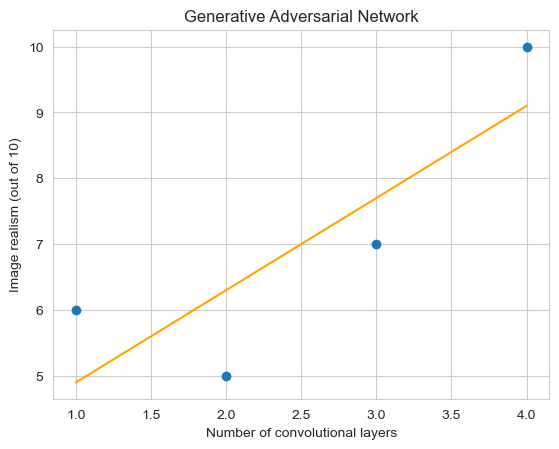

In [702]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')

For fun, following the linear algebra in the slides, we could output $\hat{y}$ across all the instances $i$: 
$$ \hat{y} = Xw $$

In [703]:
X = np.concatenate([np.matrix(np.ones(x.size)).T, np.matrix(x).T], axis=1)
X

matrix([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]])

In [704]:
yhat = np.dot(X, w)
yhat

matrix([[4.9, 6.3, 7.7, 9.1]])

Incidentally, **residuals** are the distances between $\hat{y}_i$ and $y_i$:

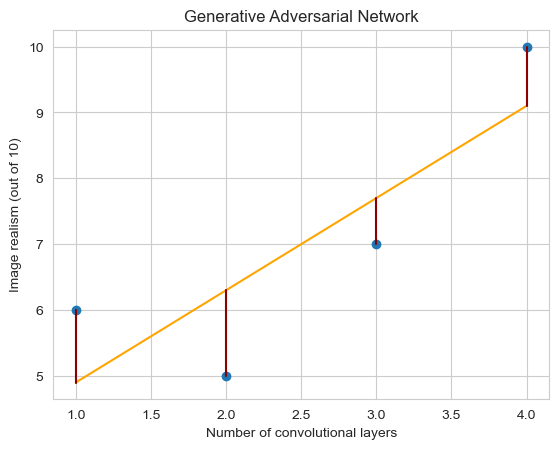

In [705]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')
for i in range(x.size):
    plt.plot([x[i],x[i]], [y[i],yhat[0,i]], color='darkred')

The square of these residuals is what we minimize with SSE in OLS regression.

The above OLS approach expands to a wide variety of circumstances: 

* Multiple features ($x$, the predictors)
* Polynomial (typically quadratic) features, e.g., $y = \beta_0 + \beta_1 x + \beta_2 x^2$
* Interacting features, e.g., $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$
* Discrete, categorical features, incl. any combination of continuous and discrete features

As an example of the latter...

In [706]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [707]:
sns.set_style('darkgrid')

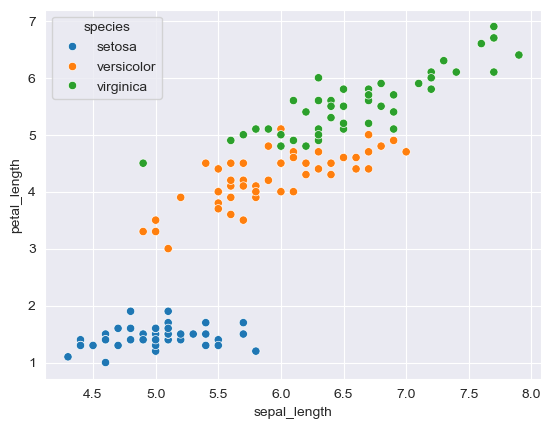

In [708]:
_ = sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)

In [709]:
import pandas as pd

In [710]:
dummy = pd.get_dummies(iris.species)
dummy

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [711]:
y = iris.petal_length

In [712]:
X = pd.concat([iris.sepal_length, dummy.setosa, dummy.versicolor], axis=1)
X # virginia as "baseline" where setosa and versicolor are both 0

,sepal_length,setosa,versicolor
0,5.1,True,False
1,4.9,True,False
2,4.7,True,False
3,4.6,True,False
4,5.0,True,False
...,...,...,...
145,6.7,False,False
146,6.3,False,False
147,6.5,False,False
148,6.2,False,False


In [713]:
import statsmodels.api as sm

In [714]:
X = sm.add_constant(X)
X

,const,sepal_length,setosa,versicolor
0,1.0,5.1,True,False
1,1.0,4.9,True,False
2,1.0,4.7,True,False
3,1.0,4.6,True,False
4,1.0,5.0,True,False
...,...,...,...,...
145,1.0,6.7,False,False
146,1.0,6.3,False,False
147,1.0,6.5,False,False
148,1.0,6.2,False,False


In [715]:
model = sm.OLS(y, X)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [716]:
result = model.fit()

NameError: name 'model' is not defined

In [717]:
result.summary()

NameError: name 'result' is not defined

Our earlier iris model, with sepal length as the only predictor of petal length, had $r^2 = 0.76$. In our latest iris model, a whopping 97% of the variance in petal length is explained by the predictors.

In [718]:
beta = result.params
beta

NameError: name 'result' is not defined

In [719]:
xline = np.linspace(4, 8, 1000)
vi_yline = beta[0] + beta[1]*xline
se_yline = beta[0] + beta[1]*xline + beta[2]
ve_yline = beta[0] + beta[1]*xline + beta[3]

NameError: name 'beta' is not defined

NameError: name 'vi_yline' is not defined

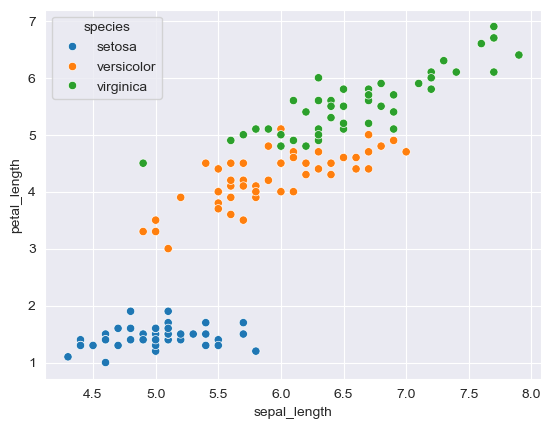

In [720]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
_ = plt.plot(xline, ve_yline, color='orange')

Now using our refined model, such that it predicts the petal length of a *versicolor* iris with a 5.5cm-long sepal: 

In [721]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 1

In [722]:
y_i = beta[0] + beta[1]*x_sepall_i + beta[2]*x_setosa_i + beta[3]*x_versic_i

NameError: name 'beta' is not defined

In [723]:
y_i

3.485368551563184

NameError: name 'vi_yline' is not defined

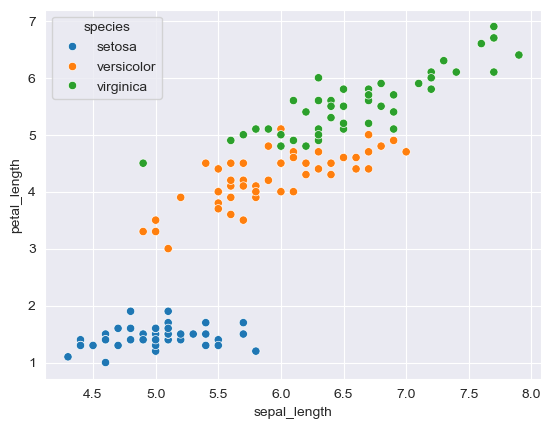

In [724]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_sepall_i, y_i, marker='o', color='purple')

...or a *virginica* with a sepal of the same length: 

In [725]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 0 # the only change

In [726]:
x_i = np.array([1, x_sepall_i, x_versic_i, x_versic_i])

In [727]:
y_i = np.dot(beta, x_i)

NameError: name 'beta' is not defined

NameError: name 'vi_yline' is not defined

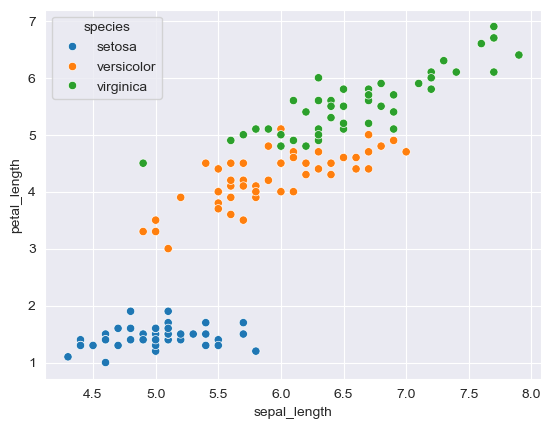

In [728]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_i[1], y_i, marker='o', color='purple')

(It is also possible to have the slope vary by categorical variable, not only the $y$-intercept. This is a *hierarchical linear model* and the classic text on it is [Gelman & Hill (2006)](https://amzn.to/3hoOevb).)

**Exercise**: 
Download the Boston dataset (process is immediately below) and use the statsmodels `OLS()` method to create a model that uses at least a few of the provided features to predict house price. 

In [729]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [730]:
boston = load_boston()

NameError: name 'load_boston' is not defined

In [731]:
# Median house price in a given neighborhood in $1000s (in the 1970s in Boston, MA): 
y = boston.target 
y[0:20]

NameError: name 'boston' is not defined

In [732]:
X = pd.DataFrame(boston.data)
X.columns = boston.feature_names
X # See variable descriptions at http://lib.stat.cmu.edu/datasets/boston

NameError: name 'boston' is not defined

### Logistic Regression

Reasonably often we'd like to have a regression model that predicts a binary outcome (e.g., identifying if a fast-food item is a hot dog or not a hot dog). This can be accomplished with **logistic regression**, which adapts linear regression by including the *logit* function: 
$$ x = \text{log}(\frac{p}{1-p}) $$
This function uses the natural logarithm and maps a binary probability $p$ (which can only range from zero to one) to an unbounded range ($-\infty$ to $\infty$).

In [733]:
def logit(my_p): # this is also available as scipy.special.logit()
    return np.log(my_p/(1-my_p))

In [734]:
logit(0.5)

0.0

In [735]:
logit(0.1) 

-2.197224577336219

In [736]:
logit(0.01) # closer to zero approaches negative infinity

-4.59511985013459

In [737]:
logit(0.99) # closer to one approaches positive infinity

4.595119850134589

More specifically, logistic regression makes use of the *expit* function (a.k.a., logistic function), which is the inverse of the logit. That is, it returns a probability $p$ when passed some unbounded input $x$: 
$$ p = \frac{1}{1+e^{-x}} $$

In [738]:
def expit(my_x): # this is also available as scipy.special.expit()
    return 1/(1+np.exp(-my_x))

In [739]:
expit(4.59512)

0.9900000014836675

This logistic function allows us to map the unbounded output of a linear regression model to a probability ranging from zero to one.

Let's dig right into a hands-on example: 

In [740]:
titanic = sns.load_dataset('titanic')

In [741]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [742]:
np.unique(titanic['survived'], return_counts=True)

(array([0, 1]), array([549, 342]))

In [743]:
np.unique(titanic['sex'], return_counts=True)

(array(['female', 'male'], dtype=object), array([314, 577]))

In [744]:
np.unique(titanic['class'], return_counts=True)

(array(['First', 'Second', 'Third'], dtype=object), array([216, 184, 491]))

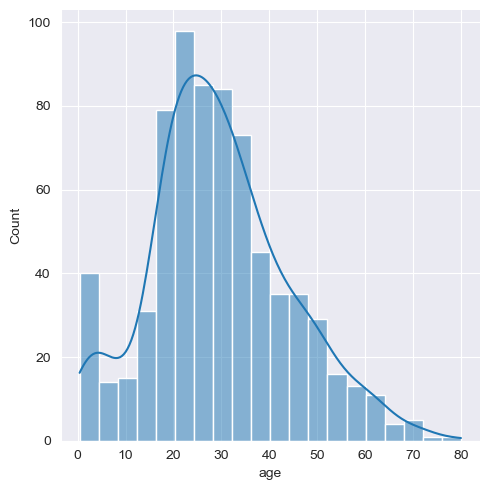

In [745]:
_ = sns.displot(titanic['age'], kde=True)

In [746]:
gender = pd.get_dummies(titanic['sex'])
gender

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [747]:
clas = pd.get_dummies(titanic['class'])
clas

,First,Second,Third
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
886,False,True,False
887,True,False,False
888,False,False,True
889,True,False,False


In [748]:
y = titanic.survived

In [749]:
X = pd.concat([clas.First, clas.Second, gender.female, titanic.age], axis=1)
X = sm.add_constant(X)
X

,const,First,Second,female,age
0,1.0,False,False,False,22.0
1,1.0,True,False,True,38.0
2,1.0,False,False,True,26.0
3,1.0,True,False,True,35.0
4,1.0,False,False,False,35.0
...,...,...,...,...,...
886,1.0,False,True,False,27.0
887,1.0,True,False,True,19.0
888,1.0,False,False,True,NaN
889,1.0,True,False,False,26.0


In [750]:
model = sm.Logit(y, X, missing='drop') # some rows contain NaN

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [751]:
result = model.fit()

NameError: name 'model' is not defined

In [752]:
result.summary()

NameError: name 'result' is not defined

In [753]:
beta = result.params
beta

NameError: name 'result' is not defined

As an example, our model suggests a 17-year-old female traveling in first class (such as Rose in the 1997 James Cameron film) had a 95.9% of chance of surviving: 

In [754]:
linear_out = beta[0] + beta[1]*1 + beta[2]*0 + beta[3]*1 + beta[4]*17
linear_out

NameError: name 'beta' is not defined

In [755]:
expit(linear_out)

NameError: name 'linear_out' is not defined

In contrast, a 20-year-old male traveling in third class had an 11.2% chance of surviving: 

In [756]:
jack = np.array([1, 0, 0, 0, 20])

In [757]:
linear_out = np.dot(beta, jack)
linear_out

NameError: name 'beta' is not defined

In [758]:
expit(linear_out)

NameError: name 'linear_out' is not defined

**Exercises**

1. Use the scikit-learn `train_test_split()` method ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) to split the titanic data into a training data set (say, two thirds of the data) and a test data set (one third of the data). 

2. Re-train the OLS model above using your newly-created training data set. Using the test data set, test the model's quality, e.g., with respect to: 

    * Accuracy (using a standard 50% binary classification threshold) 
    * Area under the receiving operator characteristic curve (we covered this in [Calculus II](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb)).

3. Use your own creative whims to add additional features to an OLS model and train it using the training set. How does your new model compare on the test data set metrics relative to the baseline model? And how do they compare to the [Kaggle leaderboard](https://www.kaggle.com/c/titanic/leaderboard)? 

**Return to slides here.**

## Segment 3: Bayesian Statistics

### Bayes' Theorem

...allows us to find $P(\text{x}|\text{y})$ when we have $P(\text{y}|\text{x})$: 
$$ P(\text{x}|\text{y}) = \frac{P(\text{x})P(\text{y}|\text{x})}{P(\text{y})} $$

Let's use the *xkcd* [exploding sun cartoon](https://xkcd.com/1132/) as an example. Using a standard $\alpha = .05$ threshold, the frequentist rejected the null hypothesis that the sun hadn't exploded because the probability the neutrino detector outputs `YES` when the sun hasn't exploded is $\frac{1}{6} \times \frac{1}{6} = \frac{1}{36} \approx 0.0278$, which is $<.05$.

Using Bayes' theorem, the Bayesian statistician incorporates additional information -- largely related to the probability that the sun has exploded irrespective what the neutrino detector says -- to draw a different conclusion. 

Let's likewise use some back-of-the-envelope figures to estimate the probability the sun has exploded ($x = \text{exploded}$) given the neutrino detector output `YES` ($y = \text{YES}$); that is, $P(x|y)$. To find this, we'll need $P(y|x)$, $P(x)$, and $P(y)$.

$P(y = \text{YES} | x = \text{exploded}) = \frac{35}{36} \approx 0.972 $.

$P(x = \text{exploded})$ can be roughly estimated. It is generous to assume a $\frac{1}{1000}$ chance because for every thousand days that pass, the sun explodes far less often than once. Further, unless the sun had exploded only in the past few minutes, we'd already be dead. So, the probability that we are alive in an instant where the sun has exploded is extremely small. Anyway, let's go with $\frac{1}{1000}$ because even with this exceedingly generous figure, we'll demonstrate the point. 

$P(y = \text{YES})$: As is often the case, this probability in the Bayes' theorem denominator can be calculated with information we already have because: 
$$ P(\text{y}) = \sum_x P(\text{y}|x)P(x) $$ 
Summing over the two possible states of x ($x =$ exploded, $x =$ not exploded): 
$$ P(y = \text{YES}) = P(\text{YES given exploded})P(\text{exploded}) + P(\text{YES given not exploded})P(\text{not exploded}) $$
$$ = \left(\frac{35}{36}\right)\left(\frac{1}{1000}\right) + \left(\frac{1}{36}\right)\left(\frac{999}{1000}\right) $$ 
...which comes out to $P(y = \text{YES}) \approx 0.0287$:

In [759]:
py = (35/36.)*(1/1000.) + (1/36.)*(999/1000.)
py

0.02872222222222222

Now we have everything we need to apply Bayes' theorem:  

In [760]:
py_givenx = 0.972
px = .0001

In [761]:
def bayes(my_px, my_pygivenx, my_py):
    return (my_px*my_pygivenx)/my_py

In [762]:
bayes(px, py_givenx, py)

0.0033841392649903296

Therefore, even with our generous baseline estimate of a $\frac{1}{1000}$ chance of the sun having exploded, Bayes' rule enables us to find a 0.3% chance the sun has exploded given the neutrino detector output `YES`. Certainly odds that merit making a $50 bet! 

It would require several hours to describe Bayesian inference beyond Bayes' theorem (e.g., training on a dataset with the `PyMC3` library) so it's beyond our current scope, but for a taste check out [this blog post](https://towardsdatascience.com/estimating-probabilities-with-bayesian-modeling-in-python-7144be007815) and [associated Jupyter notebook](https://github.com/WillKoehrsen/probabilistic-programming/blob/master/Estimating%20Probabilities%20with%20Bayesian%20Inference.ipynb) from Will Koehrsen. 

**Return to slides here.**